# (Core) Project 1: Global Explanations


## Task
- For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
## Customization Options
pd.set_option("display.max_columns",100)
mpl.rcParams['figure.facecolor']='white'
## additional required imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn import metrics
## fixing random for lesson generation
SEED = 321
np.random.seed(SEED)

## Project 1 Revisited - Part 2: Global Explanations
### Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

### Load Joblib File

In [2]:
# load the contents of your "best-models.joblib" file into a variable called "loaded_joblib
loaded_joblib = joblib.load('best_models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [3]:
# Assign all keys to new variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_model = loaded_joblib['LinearRegression']
ran_model = loaded_joblib['RandomForest']

### Confirm file loaded properly

In [4]:
# Display X_train data to confirm results
X_train_df.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
8269        7.220         0.064142   61.2510                     1998.0   
7604        6.135         0.079294  111.2860                     2009.0   
2762       12.150         0.028593  151.0708                     2004.0   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
8269                  0.0                       0.0                       1.0   
7604                  1.0                       0.0                       0.0   
2762                  0.0                       1.0                       0.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
8269                       0.0                   0.0                     1.0   
7604                       0.0                   0.0                     0.0   
2762                       0.0                   0.0                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
8269               0.0                  0.0               0.0   
7604               0.0                  0.0               0.0   
2762               0.0                  0.0               0.0   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
8269              0.0                     0.0   
7604              0.0                     0.0   
2762              0.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
8269                              0.0                    0.0   
7604                              0.0                    0.0   
2762                              0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
8269                           0.0                  0.0             0.0   
7604                           0.0                  0.0             0.0   
2762                           0.0                  1.0             0.0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
8269               0.0                0.0                    0.0   
7604               0.0                0.0                    0.0   
2762               0.0                0.0                    0.0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_High  \
8269                    0.0                      0.0               0.0   
7604                    1.0                      0.0               0.0   
2762                    0.0                      0.0               0.0   

      Outlet_Size_Medium  Outlet_Size_N/A  Outlet_Size_Small  \
8269                 0.0              1.0                0.0   
7604                 1.0              0.0                0.0   
2762                 0.0              0.0                1.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
8269                          0.0                          0.0   
7604                          0.0                          0.0   
2762                          0.0                          1.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
8269                          1.0                        1.0   
7604                          1.0                        0.0   
2762                          0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
8269                            0.0                            0.0   
7604                            0.0                            1.0   
2762                            1.0                            0.0   

      Outlet_Type_Supermarket Type3  
8269                            0.0  
7604                            0.0  
2762                            0.0

In [5]:
# Display X_test data to confirm results
X_test_df.head(3)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
8077        15.25         0.061531  132.2968                     2007.0   
2391        17.85         0.044463  127.1020                     1997.0   
163          7.27         0.071078  114.2518                     1997.0   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
8077                  0.0                       1.0                       0.0   
2391                  0.0                       1.0                       0.0   
163                   0.0                       1.0                       0.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
8077                       0.0                   0.0                     0.0   
2391                       0.0                   0.0                     0.0   
163                        0.0                   0.0                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
8077               0.0                  0.0               0.0   
2391               0.0                  0.0               0.0   
163                0.0                  0.0               0.0   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
8077              0.0                     0.0   
2391              0.0                     0.0   
163               0.0                     0.0   

      Item_Type_Fruits and Vegetables  Item_Type_Hard Drinks  \
8077                              0.0                    0.0   
2391                              0.0                    0.0   
163                               0.0                    0.0   

      Item_Type_Health and Hygiene  Item_Type_Household  Item_Type_Meat  \
8077                           0.0                  1.0             0.0   
2391                           0.0                  0.0             0.0   
163                            0.0                  0.0             0.0   

      Item_Type_Others  Item_Type_Seafood  Item_Type_Snack Foods  \
8077               0.0                0.0                    0.0   
2391               0.0                0.0                    1.0   
163                0.0                0.0                    0.0   

      Item_Type_Soft Drinks  Item_Type_Starchy Foods  Outlet_Size_High  \
8077                    0.0                      0.0               0.0   
2391                    0.0                      0.0               0.0   
163                     1.0                      0.0               0.0   

      Outlet_Size_Medium  Outlet_Size_N/A  Outlet_Size_Small  \
8077                 0.0              1.0                0.0   
2391                 0.0              0.0                1.0   
163                  0.0              0.0                1.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
8077                          0.0                          1.0   
2391                          1.0                          0.0   
163                           1.0                          0.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
8077                          0.0                        0.0   
2391                          0.0                        0.0   
163                           0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
8077                            1.0                            0.0   
2391                            1.0                            0.0   
163                             1.0                            0.0   

      Outlet_Type_Supermarket Type3  
8077                            0.0  
2391                            0.0  
163                             0.0

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer
- Calculate the shap values for your model.

- Create a summary plot - with plot_type='bar':
 - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
   - Are they the same features in both? If not, what's different?
 - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
 - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
 - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [6]:
# Import shap
import shap
shap.initjs()

### Create an X_shap and y_shap variable from your training data (use shap.sample as needed).

In [7]:
# Check the number of rows in X_train data
len(X_train_df)

6392

- The sample size chosen for this model will be 600.

In [8]:
X_shap = shap.sample(X_train_df, nsamples=600, random_state=SEED)
X_shap

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4469         7.72         0.074669   76.3986                     1987.0   
4438         5.11         0.034868  163.8210                     2004.0   
366          8.05         0.078386  256.4646                     2004.0   
2219         8.76         0.050131  128.3336                     1999.0   
6080         6.59         0.176748   82.7908                     1998.0   
...           ...              ...       ...                        ...   
896         16.20         0.128683  178.4370                     2002.0   
3926        20.50         0.023179  154.0340                     1999.0   
3369        11.00         0.037954   38.4480                     1999.0   
1291         4.88         0.223440   52.2298                     1998.0   
8156        15.20         0.050280   94.1752                     2002.0   

      Item_Fat_Content_LF  Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
4469                  0.0                       0.0                       1.0   
4438                  0.0                       1.0                       0.0   
366                   0.0                       0.0                       1.0   
2219                  0.0                       1.0                       0.0   
6080                  0.0                       1.0                       0.0   
...                   ...                       ...                       ...   
896                   0.0                       0.0                       1.0   
3926                  1.0                       0.0                       0.0   
3369                  0.0                       1.0                       0.0   
1291                  0.0                       0.0                       1.0   
8156                  0.0                       1.0                       0.0   

      Item_Fat_Content_low fat  Item_Fat_Content_reg  Item_Type_Baking Goods  \
4469                       0.0                   0.0                     0.0   
4438                       0.0                   0.0                     0.0   
366                        0.0                   0.0                     0.0   
2219                       0.0                   0.0                     0.0   
6080                       0.0                   0.0                     0.0   
...                        ...                   ...                     ...   
896                        0.0                   0.0                     0.0   
3926                       0.0                   0.0                     0.0   
3369                       0.0                   0.0                     0.0   
1291                       0.0                   0.0                     1.0   
8156                       0.0                   0.0                     0.0   

      Item_Type_Breads  Item_Type_Breakfast  Item_Type_Canned  \
4469               1.0                  0.0               0.0   
4438               0.0                  0.0               0.0   
366                0.0                  0.0               0.0   
2219               0.0                  0.0               0.0   
6080               0.0                  0.0               0.0   
...                ...                  ...               ...   
896                0.0                  0.0               0.0   
3926               0.0                  0.0               0.0   
3369               0.0                  0.0               0.0   
1291               0.0                  0.0               0.0   
8156               0.0                  0.0               0.0   

      Item_Type_Dairy  Item_Type_Frozen Foods  \
4469              0.0                     0.0   
4438              0.0                     0.0   
366               0.0                     0.0   
2219              0.0                     0.0   
6080              0.0                     0.0   
...               ...                     ...   
896               0.0                     1.0  

In [9]:
# Get corresponding y-values form x_shap index
y_shap = y_train.loc[X_shap.index]
y_shap

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
896     1058.6220
3926    2450.1440
3369    1198.4400
1291     161.7894
8156    2109.2544
Name: Item_Outlet_Sales, Length: 600, dtype: float64

In [10]:
## Resetting the index for sampled data to match shap_values integer index
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

### Create a model explainer

In [11]:
# Instantiate an explainer for the RandomForest model
explainer = shap.Explainer(ran_model)
explainer

### Calculate the shap values for your model

In [12]:
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(600, 36)

In [13]:
# Compare shap values to X_shap data shape
X_shap.shape

(600, 36)

### Create a summary plot - with plot_type='bar':

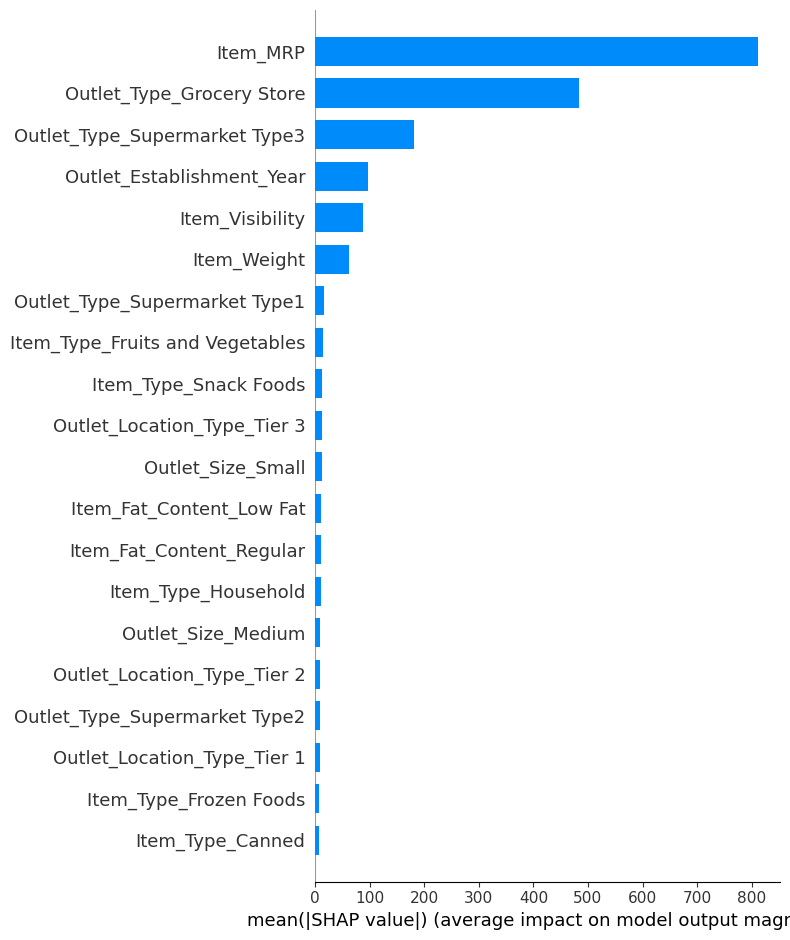

In [14]:
# Create summary plot
fig_1 = shap.summary_plot(shap_values, X_shap, plot_type='bar');

## Original Feature Importances

![png](Data/most_important_features.png)

## Compare the most important features according to SHAP vs. your original feature importances:

- Based on the plots above, it appears SHAP's top 5 feature importances differ slightly from the built-in random forest importances.
- Both plots show that the 'Item_MRP' and 'Outlet_Type_Grocery Store' features have the most impact on the model's predictions.
- However, the SHAP plot shows that features like 'Outlet_Establishment_Year' hold more significance than in the original plot and features like 'Item_Weight' are no longer in the top 5 importances.

### Create a second summary plot - with plot_type='dot'


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


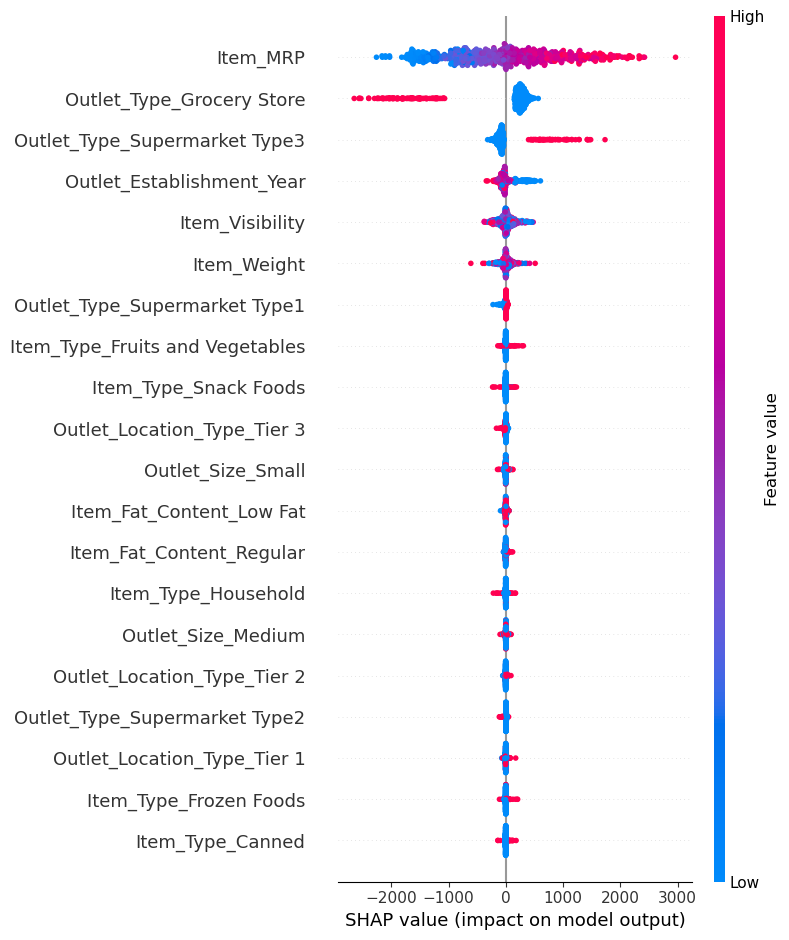

In [15]:
# Create plot_type='dot'
fig_2 = shap.summary_plot(shap_values, X_shap);

## Interpret the top 3 most important features and how they influence your model's predictions:

- Based on the summary plot above, the top 3 most important features are 'Item_MRP', 'Outlet_Type_Grocery Store', and 'Outlet_Type_Supermarket_Type3'.
- #### Item MRP:
 - Item MRP (list prices of the items) has the largest effect on the model's predictions.
 - The higher values being to the right of the y-axis indicates the greater the list price on sold items, the more likely the model will predict higher product sales.
- #### Outlet Type Grocery Store:
 - With this feature being one hot encoded, the red values represent if the outlet type was classified as grocery store, and the blue values represent it not being a grocery store.
 - Products sold in outlet types that are classified as grocery stores will cause the model to be much less likely to predict an increase in product sales.
- #### Outlet Type Supermarket Type 3:
 - Like with "Outlet Type Grocery Store", the Outlet Type Supermarket Type 3 feature is also one hot encoded.
 - Products sold in Type 3 Supermarkets will cause the model to be much more likely to predict an increase in product sales.

## Save your bar summary plot figure as a .png file inside your repository:

In [16]:
# Create 'images' folder
import os
os.makedirs("images/", exist_ok=True)

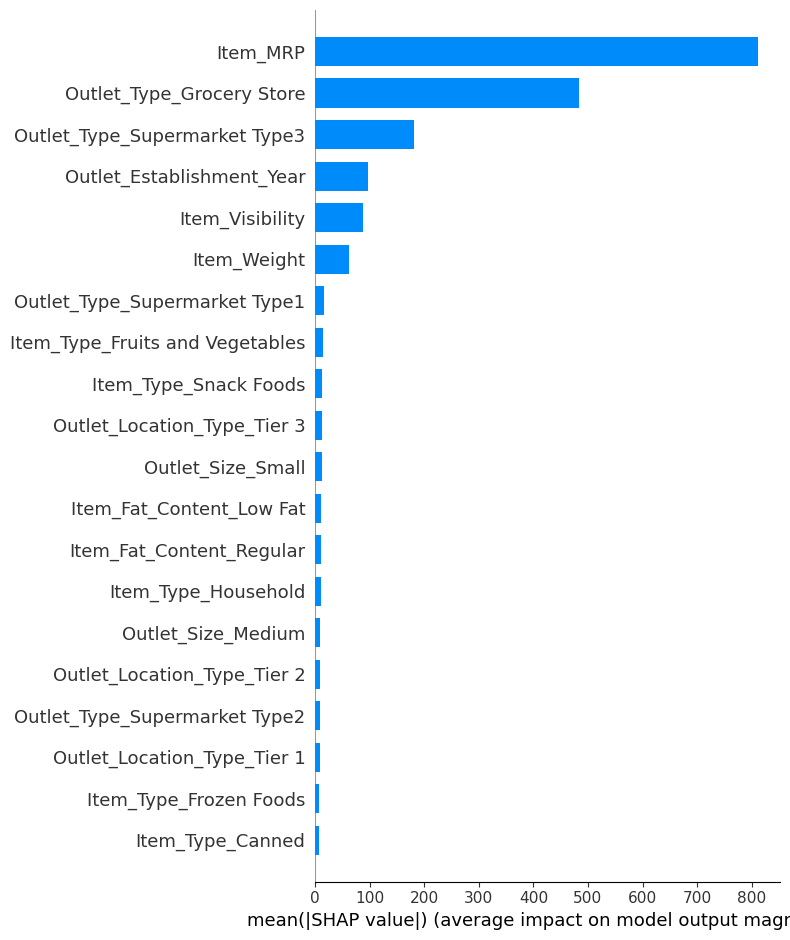

In [17]:
# Save fig_1 to 'images' folder
fig_1, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type='bar')
ax.set_title('Summary Plot - Sales Predictions');
# fig_1.savefig('images/summary_plot_bar.png')

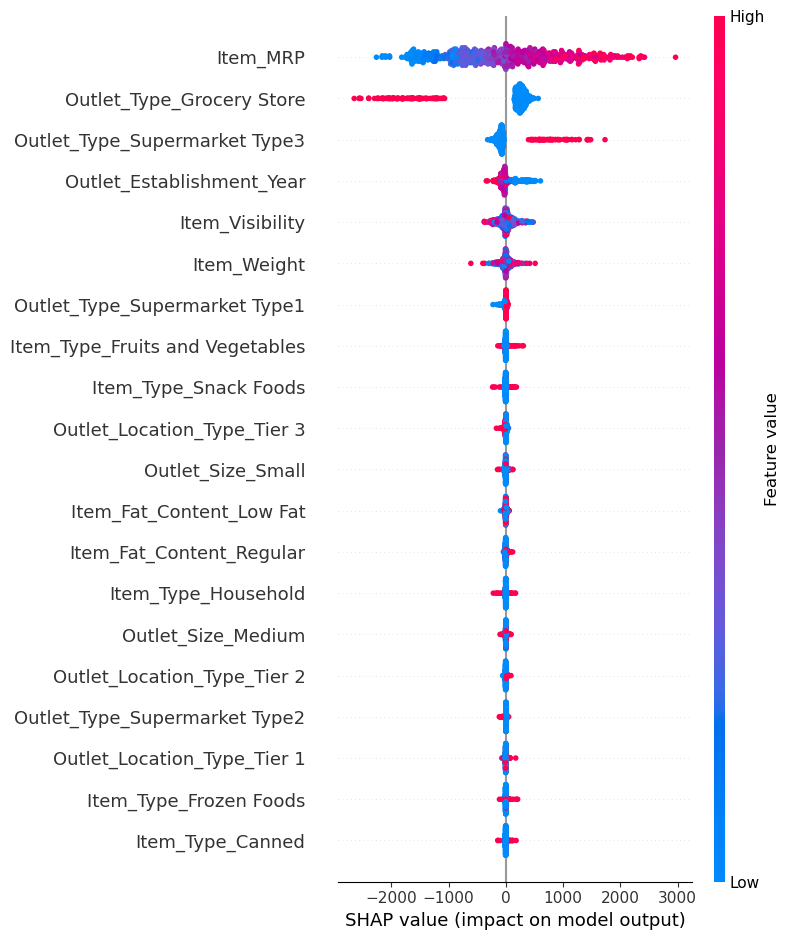

In [18]:
# Save fig_2 to 'images' folder
fig_2, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap)
ax.set_title('Summary Plot - Sales Predictions');
#fig_2.savefig('images/summary_plot_dot.png')

# (Core) Project 1: Local Explanations


## Task
- For this assignment, you will revisit your first project to predict supermarket sales. You will apply everything you've learned this week to explain how your models made their predictions.

## Part 3 - Local Explanations
Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

- #### Select at least 2 example rows based on the insights gained from your previous core assignments this week.
- #### Explain why you selected the examples that you did.
- If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).

In [19]:
# Instantiate LIME explainer for model
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(training_data=X_shap.values, feature_names=X_shap.columns, mode='regression')
lime_explainer

### Group 1 Supermarket Type 3 - High

In [20]:
# Find value counts for 'Outlet_Type_Supermarket Type3' column
X_shap['Outlet_Type_Supermarket Type3'].value_counts()

0.0    538
1.0     62
Name: Outlet_Type_Supermarket Type3, dtype: int64

In [21]:
# Create filter where 'Outlet_Type_Supermarket Type3'==1.0
super_3 = X_shap['Outlet_Type_Supermarket Type3']==1.0
len(X_shap[super_3])

62

In [22]:
# Find "Item_MRP" max value
X_shap['Item_MRP'].max()

265.2884

In [23]:
# Find highest values for 'Item_MRP'
item_high = X_shap['Item_MRP'] > 200.00
len(X_shap[item_high])

87

In [24]:
# Combine both filters for first example
supermarket3_high = super_3 & item_high
supermarket3_high.sum()

6

### Group 2 Supermarket Type 3 - Low

In [25]:
# Find "Item_MRP" min value
X_shap['Item_MRP'].min()

32.3558

In [26]:
# Find the lowest values for 'Item_MRP'
item_low = X_shap['Item_MRP'] < 50.00
len(X_shap[item_low])

65

In [27]:
# Combine both filters for second example
supermarket3_low = super_3 & item_low
supermarket3_low.sum()

7

## Sample Explanations:

- I have chosen examples from Supermarket Type 3's highest and lowest item sales.
- I would like to make further observations into what other factors could affect the model's predictions for product sales pertaining to supermarket 3 types.

## For each example, produce :

### A Lime tabular explanation
  - Interpret what features most heavily influenced the predictions, according to LIME.
  - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the lime explanation.

In [34]:
# Get model predictions
y_pred = ran_model.predict(X_shap)
y_pred = pd.Series(y_pred, index=X_shap.index, name='Predicted')
y_pred

0      1309.375596
1      2434.058272
2      5365.602304
3      2175.328392
4       109.710524
          ...     
595    1688.328982
596    2537.929730
597     955.123390
598     153.646666
599    1785.122986
Name: Predicted, Length: 600, dtype: float64

### Supermarket - High Group

In [28]:
# Select index of Supermarket - High Group
idx_sample_high = X_shap[supermarket3_high].index
idx_sample_high

Int64Index([36, 246, 323, 351, 482, 505], dtype='int64')

In [38]:
# Select a random index for sample 1
group_super_high = np.random.choice(idx_sample_high)
group_super_high = 505
sample_super_high = X_shap.loc[group_super_high]
sample_super_high.head()

Item_Weight                    12.822634
Item_Visibility                 0.005210
Item_MRP                      265.288400
Outlet_Establishment_Year    1985.000000
Item_Fat_Content_LF             0.000000
Name: 505, dtype: float64

In [39]:
# Check true and predicted values for sample 1
print(f"Example of Supermarket Type 3 High Item Sale:")
print(f"True Item Sales Value = {y_shap.loc[group_super_high]}")
print(f"Predicted Item Sales Value  = {y_pred.loc[group_super_high]}")

Example of Supermarket Type 3 High Item Sale:
True Item Sales Value = 3179.8608
Predicted Item Sales Value  = 5014.918786000008


In [40]:
# Plot LIMETabulerExplainer
example_high = lime_explainer.explain_instance(sample_super_high,
                                           ran_model.predict)
example_high.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


## LIME Interpretations for Supermarket - High Group:

### Supermarket - Low Group

In [31]:
# Select index of Supermarket - Low Group
idx_sample_low = X_shap[supermarket3_low].index
idx_sample_low

Int64Index([57, 80, 213, 219, 316, 359, 514], dtype='int64')

In [32]:
# Select a random index for sample 1
group_super_low = np.random.choice(idx_sample_low)
group_super_low = 219
sample_super_low = X_shap.loc[group_super_low]
sample_super_low.head()

Item_Weight                    12.822634
Item_Visibility                 0.160707
Item_MRP                       38.019000
Outlet_Establishment_Year    1985.000000
Item_Fat_Content_LF             0.000000
Name: 219, dtype: float64

In [36]:
# Check true and predicted values for sample 2
print(f"Example of Supermarket Type 3 High Item Sale:")
print(f"True Item Sales Value = {y_shap.loc[group_super_low]}")
print(f"Predicted Item Sales Value  = {y_pred.loc[group_super_low]}")

Example of Supermarket Type 3 High Item Sale:
True Item Sales Value = 1318.284
Predicted Item Sales Value  = 1106.8658679999999


In [37]:
# Plot LIMETabulerExplainer
example_low = lime_explainer.explain_instance(sample_super_low,
                                           ran_model.predict)
example_low.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


## LIME Interpretations for Supermarket - Low Group:

### An individual Force Plot
 - Interpret what features most heavily influenced the predictions, according to SHAP.
 - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the individual force plot.